In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import csv

In [2]:
#plots accuracy, returns None
def plot_accuracy(x, y, name):
    plt.plot(x, y)
    plt.xlabel('num_samples')
    plt.ylabel('accuracy')
    plt.title(name)
    plt.show()

In [3]:
def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
    valid_error, train_error = train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y, name)
    plot_accuracy(samples, train_error, name + ' Training_Accuracy')
    plot_accuracy(samples, valid_error, name + ' Validation_Accuracy')
    return valid_error, train_error

In [4]:
# Purpose: Trains SVM
# Params:
# Return: list of valid_errors from each experiment
#REMEMBER TO UPDATE THE RETURN VALID_ERROR, TRAIN_ERROR, need to do train_svm[0] to get valid_error
#poor naming for what's returned, says error but should be score
def train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y, name):
    train_error = list()
    valid_error = list()
    for sample_size in samples:
        print("Sample_size: " + str(sample_size))
        clf.fit(train_set[:sample_size], train_y[:sample_size])
        train_score = clf.score(train_set, train_y)
        train_error.append(train_score)
        valid_score = clf.score(valid_set, valid_y)
        valid_error.append(valid_score)
        print("valid_score:  train_score ")
        print(valid_score: train_score)
    return valid_error, train_error

In [5]:
#Splits data set into training and validation set of given size
#SHould this return a 2-d numpy array for labels? or keep it at one? clf requires 1-d, but concatenate requires 2.
def split_train_and_valid_sets(data, size):
    np.random.shuffle(data)
    shape = data.shape[0] 
    valid_set = data[:size, :-1] 
    valid_y = data[:size, -1] 
    train_set = data[size:, :-1] 
    train_y = data[size:, -1]
    return shape, valid_set, valid_y, train_set, train_y

In [5]:
# -----------MNIST SET-------- (sklearn fn)
mnist_dict = io.loadmat('../mnist/train.mat')
mnist_trainX = mnist_dict['trainX']

In [6]:
mnist_train_set, mnist_valid_set, mnist_train_y, mnist_valid_y = train_test_split(mnist_trainX[:, :-1], mnist_trainX[:, -1], test_size=10000, random_state=42)
print('mnist_train_set ' + str(mnist_train_set.shape))
print('mnist_valid_set ' + str(mnist_valid_set.shape))
print('mnist_train_y ' + str(mnist_train_y.shape))
print('mnist_valid_y ' + str(mnist_valid_y.shape))

mnist_train_set (50000, 784)
mnist_valid_set (10000, 784)
mnist_train_y (50000,)
mnist_valid_y (10000,)


In [9]:
# -----------CIFAR-10 SET -------- (sklearn fn)
cifar_dict = sp.io.loadmat('../cifar/train.mat')
cifar_trainX = cifar_dict['trainX']

In [10]:
cifar_train_set, cifar_valid_set, cifar_train_y, cifar_valid_y = train_test_split(cifar_trainX[:, :-1], cifar_trainX[:, -1], test_size=5000, random_state=42)

In [ ]:
print('cifar_train_set ' + str(cifar_train_set.shape))
print('cifar_valid_set ' + str(cifar_valid_set.shape))
print('cifar_train_y ' + str(cifar_train_y.shape))
print('cifar_valid_y ' + str(cifar_valid_y.shape))

In [9]:
# --------------SPAM DataSet (sklearn fn)----------------
spam_dict = sp.io.loadmat('../spam/spam_data.mat')
spam_trainX= spam_dict['training_data']
spam_labels = spam_dict['training_labels']

In [10]:
spam_train_set, spam_valid_set, spam_train_y, spam_valid_y = train_test_split(spam_trainX, spam_labels.T, test_size=0.2, random_state=42)

In [11]:
print('spam_train_set ' + str(spam_train_set.shape))
print('spam_valid_set ' + str(spam_valid_set.shape))
print('spam_train_y ' + str(spam_train_y.shape))
print('spam_valid_y ' + str(spam_valid_y.shape))

spam_train_set (4137, 32)
spam_valid_set (1035, 32)
spam_train_y (4137, 1)
spam_valid_y (1035, 1)


Training MNIST
Sample_size: 100
train_score: 0.69646
valid_score: 0.6908
Sample_size: 200
train_score: 0.81514
valid_score: 0.8101
Sample_size: 500
train_score: 0.8658
valid_score: 0.8686
Sample_size: 1000
train_score: 0.88408
valid_score: 0.882
Sample_size: 2000
train_score: 0.89828
valid_score: 0.8967
Sample_size: 5000
train_score: 0.9148
valid_score: 0.9084
Sample_size: 10000
train_score: 0.92634
valid_score: 0.9092


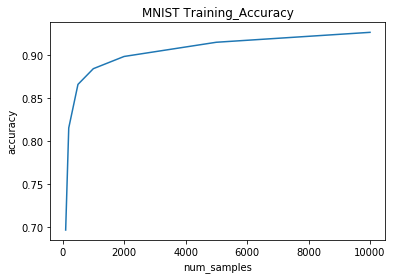

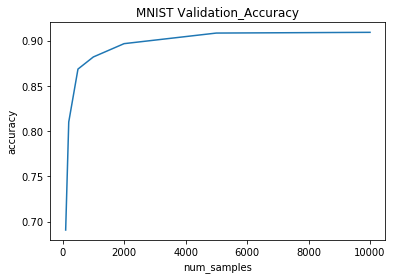

In [13]:
# *********************PROBLEM 2 --> TRAIN DATA ***********************

# ----------TRAIN MNIST DATA------------#
print("Training MNIST")
clf_mnist = SVC(kernel="linear")
experiments = [100, 200, 500, 1000, 2000, 5000, 10000]
# expect between 70-90% accuracy
valid_error, train_error = train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y,
          'MNIST')
# print('Valid_error is: ' + str(valid_error))
# print('Train_error is: ' + str(train_error))

Training CIFAR
Sample_size: 100
train_score: 0.207666666667
valid_score: 0.2076
Sample_size: 200
train_score: 0.250488888889
valid_score: 0.2488
Sample_size: 500
train_score: 0.291533333333
valid_score: 0.2804
Sample_size: 1000
train_score: 0.3008
valid_score: 0.2766
Sample_size: 2000
train_score: 0.326355555556
valid_score: 0.28
Sample_size: 5000
train_score: 0.375422222222
valid_score: 0.2894


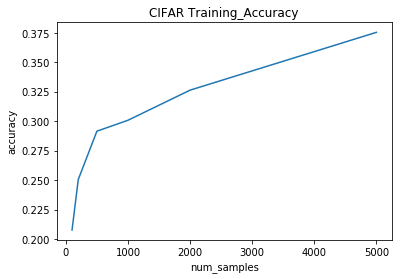

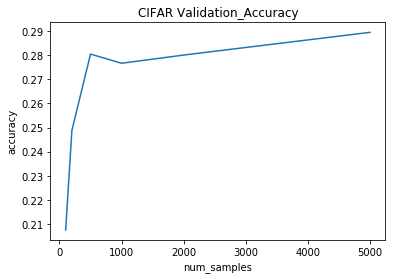

Valid_error is [0.20760000000000001, 0.24879999999999999, 0.28039999999999998, 0.27660000000000001, 0.28000000000000003, 0.28939999999999999]
Train_error is: [0.20766666666666667, 0.25048888888888887, 0.29153333333333331, 0.30080000000000001, 0.32635555555555557, 0.37542222222222221]


In [16]:
# -----------TRAIN CIFAR DATA-----------#
print("Training CIFAR")
clf_cifar = SVC(kernel='linear')
experiments = [100, 200, 500, 1000, 2000, 5000]
# expect between 25-35% accuracy
valid_error, train_error = train_svm(experiments, clf_cifar, cifar_train_set, cifar_train_y, cifar_valid_set, cifar_valid_y, 'CIFAR')
# print('Valid_error is ' + str(valid_error))
# print('Train_error is: ' + str(train_error))

Training SPAM
Sample_size: 100
train_score: 0.781295311745
valid_score: 0.771760154739
Sample_size: 200
train_score: 0.801594973417
valid_score: 0.791102514507
Sample_size: 500
train_score: 0.793136781054
valid_score: 0.785299806576
Sample_size: 1000
train_score: 0.805219913001
valid_score: 0.788201160542
Sample_size: 2000
train_score: 0.802561623973
valid_score: 0.796905222437
Sample_size: 4137
train_score: 0.81029482842
valid_score: 0.797872340426


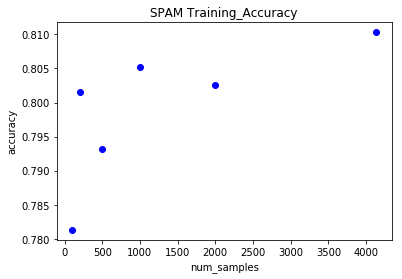

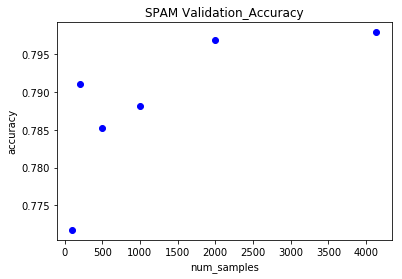

Valid_error is: [0.77176015473887816, 0.79110251450676983, 0.7852998065764023, 0.78820116054158607, 0.79690522243713735, 0.7978723404255319]
Train_error is: [0.78129531174480427, 0.80159497341710972, 0.79313678105364915, 0.80521991300145002, 0.80256162397293374, 0.81029482841952638]


In [20]:
# ----------TRAIN SPAM DATA -------------
print("Training SPAM")
clf_spam = SVC(kernel="linear")
experiments = [100, 200, 500, 1000, 2000, 4137]
# expect between 70-90% accuracy
valid_error, train_error = train_svm(experiments, clf_spam, spam_train_set, spam_train_y, spam_valid_set, spam_valid_y, 'SPAM')
# print('Valid_error is: ' + str(valid_error))
# print('Train_error is: ' + str(train_error))

In [9]:
# ************************** PROBLEM 3: BEST C Value ********************************
from sklearn.svm import SVC
C_range = [.01, .001, .0001, .00001, .000001, .0000001, .00000001, .000000001]
experiments = [10000]
for C in C_range:
    clf_mnist = SVC(kernel="linear", C=C)
    scores = train_svm_no_plot(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST')
    print('C value: ' + str(C))
    print('valid_score ' + str(scores[0]))

C value: 0.01
valid_score [0.90920000000000001]
C value: 0.001
valid_score [0.90920000000000001]
C value: 0.0001
valid_score [0.90949999999999998]
C value: 1e-05
valid_score [0.91590000000000005]
C value: 1e-06
valid_score [0.93189999999999995]
C value: 1e-07
valid_score [0.92300000000000004]
C value: 1e-08
valid_score [0.89339999999999997]


In [11]:
# ************************** PROBLEM 3: BEST C Value ********************************
# TODO: Need to test these C values
from sklearn.svm import SVC
C_range = [.000002, .000003, .000004, .000005, .000006]
experiments = [10000]
for C in C_range:
    clf_mnist = SVC(kernel="linear", C=C)
    scores = train_svm_no_plot(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST')
    print('C value: ' + str(C))
    print('valid_score ' + str(scores[0]))

C value: 2e-06
valid_score [0.92769999999999997]
C value: 3e-06
valid_score [0.92300000000000004]
C value: 4e-06
valid_score [0.92100000000000004]
C value: 5e-06
valid_score [0.92020000000000002]
C value: 6e-06
valid_score [0.91820000000000002]


In [ ]:
# ************************** PROBLEM 3: BEST C Value ********************************
#got this from http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html #
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range, kernel=('linear', 'rbf'))
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(mnist_train_set, mnist_train_y)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
# ************************** PROBLEM 3: BEST C Value ********************************
#got this from http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html #
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range, kernel=('linear', 'rbf'))
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(mnist_train_set, mnist_train_y)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [14]:
# ************************** PROBLEM 4: K-FOLD ********************************
def k_fold_split(data, clf, k, name):
    np.random.shuffle(data)
    valid_errors = list()
    copy_data = data[:, :]
    for i in range(k):
        if is_divisible_by_k(copy_data, k):
            k_arrays = np.split(copy_data, k)
        else:
            divisible_data, extra_data = preprocess_data(copy_data, k)
            k_arrays = np.split(divisible_data, k)
            np.vstack((k_arrays[-1], extra_data)) 
        valid_set = k_arrays.pop(i)
        valid_data = valid_set[:, :-1]
        valid_y = valid_set[:, -1]
        train_set = np.vstack(k_arrays)
        train_data = train_set[:, :-1]
        train_y = train_set[:, -1]
        valid_errors.append(train_svm_no_plot([train_data.shape[0]], clf, train_data, train_y, valid_data, valid_y, name)[0])
    valid_score = np.sum(valid_errors)/k
    print("Valid Score is:")
    print(valid_score)
    return valid_score

In [15]:
def preprocess_data(data, k):
    remainder = data.shape[0] % k
    extra_samples = data[-remainder:, :]
    divisible_samples = data[:-remainder, :]
    return divisible_samples, extra_samples

In [ ]:
def is_divisible_by_k(data, k):
    if data.shape[0] % k == 0:
        return True
    return False

In [ ]:
print("Running KFOLD")
clf_spam = SVC(C=1000)
# both arrays need to be 2-dimensional
two_dim_label = np.array(spam_train_y)
spam_training = np.hstack((spam_train_set, two_dim_label))
k_fold_split(spam_training, clf_spam, 5, 'SPAM')

In [8]:
# ****************** PROBLEM 5: KAGGLE COMPETITION ***************
# import csv

In [ ]:
# --------------- EXPERIMENT WITH MNIST CLF HYPER-PARAMETERS ------------------------#

In [8]:
# clf_mnist = SVC(C=0.000001, kernel="linear", )
# experiments = [1000]
# # expect between 70-90% accuracy
# valid_error, train_error = train_svm_no_plot(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y,
#           'MNIST')

Sample_size: 1000
train_score: 0.89012
valid_score: 0.8893


In [12]:
# mnist submission
# clf_mnist = SVC(C=0.000001, kernel="linear")
# mnist_data = io.loadmat('../mnist/test.mat')['testX']
# clf_mnist.fit(mnist_train_set, mnist_train_y)
# predicted_labels = clf_mnist.predict(mnist_data)
# # file = open('mnist_submission.csv', 'w')
# # w = csv.writer(f)

# with open('mnist_kaggle.csv', 'w') as csvfile:
#     writer = csv.writer(csvfile)
#     for i in range(len(predicted_labels)):
#         writer.writerow([i, predicted_labels[i]])
# csvfile.close()

In [ ]:
# spam_data = io.loadmat('spam/spam_data.mat')
# print(spam_data.keys())

In [ ]:
# spam submission
# spam_data = io.loadmat('spam/spam_data.mat')['testX']
# predicted_labels = clf_spam.predict(spam_data)
# file = open('mnist_submission.csv', 'w')
# w = csv.writer(f)

# with open('spam_sample_submission.csv', 'w') as csvfile:
#     writer = csv.writer(csvfile)
#     for i in range(len(predicted_labels)):
#         writer.writerow([i, predicted_labels[i]])
# csvfile.close()